<a href="https://colab.research.google.com/github/anisaQode/hello-world/blob/master/Pollen_Traveller_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import pandas as pd
import numpy as np
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

In [181]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [182]:
sheet1 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1CxGecd0p2MaE9nr8aBDElibYuDo-aBo6QSoy_OBtUqo/edit?ts=6024605e#gid=1028397889')

In [183]:
ws = sheet1.worksheet('Campaigns')

In [184]:
Campaigns_df = get_as_dataframe(ws)

In [185]:
Campaigns_df.head(100)

,Event Identifier,Region,Native Stage,Last Stage Change Date,Location: Name,Number of Nights,Start Date,End Date,On Sale Date Time,Event Type,# Traveler Estimate,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,=3984258,North America,Prep,1/7/2021,"Punta Cana, Dominican Republic",4,5/20/2021,5/24/2021,12/15/2020,"[""Curated Travel""]",2160,NaN,NaN,NaN
1,=A2+175,Europe,Prep,1/12/2021,"Mykonos, Greece",4,9/24/2021,9/28/2021,NaN,"[""Curated Travel""]",735,NaN,NaN,NaN
2,=A3+175,North America,Prep,10/13/2020,"Las Vegas, Nevada",3,9/10/2021,9/13/2021,3/2/2021,"[""Spring Break""]",3605,NaN,NaN,NaN
3,=A4+175,Europe,Prep,10/27/2020,"Amsterdam, Netherlands",3,11/19/2021,11/22/2021,NaN,"[""Curated Travel""]",1563,NaN,NaN,NaN
4,=A5+175,Europe,Prep,2/1/2021,"Ibiza, Spain",4,9/8/2021,9/12/2021,NaN,"[""Curated Travel""]",4160,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,=A59+175,Europe,Postponed,10/6/2020,"Ibiza, Spain",4,10/7/2021,10/11/2021,10/22/2020,"[""Curated Travel""]",2494,NaN,NaN,NaN
59,=A60+175,Europe,Cancelled,1/7/2021,"Dubai, United Arab Emirates",4,4/1/2021,4/5/2021,12/15/2020,"[""Curated Travel""]",909,NaN,NaN,NaN
60,=A61+175,Europe,Cancelled,6/30/2020,"Amsterdam, Netherlands",3,5/7/2021,5/10/2021,4/23/2020,"[""Curated Travel""]",1314,NaN,NaN,NaN
61,=A62+175,Europe,Cancelled,6/30/2020,"Val Thorens, France",6,3/6/2021,3/12/2021,5/21/2020,"[""Curated Travel""]",1221,NaN,NaN,NaN


In [186]:
Campaigns_df.drop(['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis=1, inplace=True)

In [187]:
Campaigns_df.groupby(['Location: Name', 'Event Type'])['# Traveler Estimate'].sum()

Location: Name                  Event Type        
Amsterdam, Netherlands          ["Curated Travel"]    26334
                                ["Spring Break"]       8138
Barcelona, Spain                ["Curated Travel"]     2912
                                ["Spring Break"]       2118
Berlin, Germany                 ["Curated Travel"]     6625
Budapest, Hungary               ["Curated Travel"]     2488
Cabo San Lucas, Mexico          ["Curated Travel"]     2164
Cancun, Mexico                  ["Curated Travel"]    16738
Dubai, United Arab Emirates     ["Curated Travel"]     2969
Ibiza, Spain                    ["Curated Travel"]    21684
Lake Havasu, Arizona            ["Curated Travel"]     1590
Las Vegas, Nevada               ["Curated Travel"]    19328
                                ["Spring Break"]      10064
Les Deux Alpes, France          ["Curated Travel"]     1659
Malta                           ["Curated Travel"]     3574
Miami, Florida                  ["Curated Travel"

In [188]:
Campaigns_travellers_by_event_type = Campaigns_df.groupby(['Event Type'])['# Traveler Estimate'].sum()

In [189]:
Campaigns_travellers_by_event_type

Event Type
["Curated Travel"]    131052
["Spring Break"]       20320
Name: # Traveler Estimate, dtype: int64

In [190]:
Campaigns_location = Campaigns_df.groupby(['Location: Name'])['# Traveler Estimate'].sum().sort_values(ascending = False)

In [191]:
Campaigns_location

Location: Name
Amsterdam, Netherlands            34472
Las Vegas, Nevada                 29392
Ibiza, Spain                      21684
Cancun, Mexico                    16738
Berlin, Germany                    6625
San Juan, Puerto Rico              5779
Barcelona, Spain                   5030
Miami, Florida                     4551
Val Thorens, France                4302
Malta                              3574
Dubai, United Arab Emirates        2969
Palm Desert, California            2489
Budapest, Hungary                  2488
Cabo San Lucas, Mexico             2164
Punta Cana, Dominican Republic     2160
Tenerife, Spain                    1940
Mykonos, Greece                    1766
Les Deux Alpes, France             1659
Lake Havasu, Arizona               1590
Name: # Traveler Estimate, dtype: int64

In [192]:
Campaigns_region = Campaigns_df.groupby(['Region'])['# Traveler Estimate'].sum().sort_values(ascending = False)

In [193]:
Campaigns_region

Region
Europe           85950
North America    65422
Name: # Traveler Estimate, dtype: int64

In [194]:
# Clean up data

In [195]:
Campaigns_df.head(64)

,Event Identifier,Region,Native Stage,Last Stage Change Date,Location: Name,Number of Nights,Start Date,End Date,On Sale Date Time,Event Type,# Traveler Estimate
0,=3984258,North America,Prep,1/7/2021,"Punta Cana, Dominican Republic",4,5/20/2021,5/24/2021,12/15/2020,"[""Curated Travel""]",2160
1,=A2+175,Europe,Prep,1/12/2021,"Mykonos, Greece",4,9/24/2021,9/28/2021,NaN,"[""Curated Travel""]",735
2,=A3+175,North America,Prep,10/13/2020,"Las Vegas, Nevada",3,9/10/2021,9/13/2021,3/2/2021,"[""Spring Break""]",3605
3,=A4+175,Europe,Prep,10/27/2020,"Amsterdam, Netherlands",3,11/19/2021,11/22/2021,NaN,"[""Curated Travel""]",1563
4,=A5+175,Europe,Prep,2/1/2021,"Ibiza, Spain",4,9/8/2021,9/12/2021,NaN,"[""Curated Travel""]",4160
...,...,...,...,...,...,...,...,...,...,...,...
58,=A59+175,Europe,Postponed,10/6/2020,"Ibiza, Spain",4,10/7/2021,10/11/2021,10/22/2020,"[""Curated Travel""]",2494
59,=A60+175,Europe,Cancelled,1/7/2021,"Dubai, United Arab Emirates",4,4/1/2021,4/5/2021,12/15/2020,"[""Curated Travel""]",909
60,=A61+175,Europe,Cancelled,6/30/2020,"Amsterdam, Netherlands",3,5/7/2021,5/10/2021,4/23/2020,"[""Curated Travel""]",1314
61,=A62+175,Europe,Cancelled,6/30/2020,"Val Thorens, France",6,3/6/2021,3/12/2021,5/21/2020,"[""Curated Travel""]",1221


In [196]:
#Do we have rows with all NaN?

In [197]:
nan_df = Campaigns_df[Campaigns_df.isna().any(axis=1)]
nan_df.head()

,Event Identifier,Region,Native Stage,Last Stage Change Date,Location: Name,Number of Nights,Start Date,End Date,On Sale Date Time,Event Type,# Traveler Estimate
1,=A2+175,Europe,Prep,1/12/2021,"Mykonos, Greece",4,9/24/2021,9/28/2021,NaN,"[""Curated Travel""]",735
3,=A4+175,Europe,Prep,10/27/2020,"Amsterdam, Netherlands",3,11/19/2021,11/22/2021,NaN,"[""Curated Travel""]",1563
4,=A5+175,Europe,Prep,2/1/2021,"Ibiza, Spain",4,9/8/2021,9/12/2021,NaN,"[""Curated Travel""]",4160
5,=A6+175,Europe,Prep,NaN,"Barcelona, Spain",3,9/3/2021,9/6/2021,NaN,"[""Spring Break""]",2118
6,=A7+175,North America,Prep,NaN,"Las Vegas, Nevada",4,9/23/2021,9/27/2021,NaN,"[""Curated Travel""]",3175


In [198]:
# Augment data with additional columns , Add month columns

In [199]:
#Find / and delete it from month column
#used to_datetime instead 


In [287]:
#Campaigns_df['Month'] = Campaigns_df['Start Date'].str[0:2]
#Campaigns_df['Month'] = Campaigns_df['Month'].astype('int32')
#Campaigns_df.head()
Campaigns_df.rename(columns={'Start Date':'Start_Date', 'End Date':'End_Date', '# Traveler Estimate':'Estimated_Travellers','On Sale Date Time':'On_sale_date_time' }, inplace=True)
Campaigns_df['Start_Date'] = pd.to_datetime(Campaigns_df.Start_Date)
Campaigns_df['Start_Month'] = Campaigns_df.Start_Date.dt.month
Campaigns_df['Start_Week'] = Campaigns_df.Start_Date.dt.week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [202]:
#Stage to status mapping 

In [203]:
Campaigns_df['Native Stage'] = Campaigns_df['Native Stage'].replace({'Prep': 'Pre-Sale', 'Campaign Setup Required': 'Pre-Sale', 'Hype': 'Pre-Sale', 'Quality Assurance Review': 'Pre-Sale', 'Pre-Event Ops Planning':'Active', 'On-Sale' : 'Active', 'Postponed':'Postponed', 'Cancelled':'Cancelled'})

In [298]:
Campaigns_stage = Campaigns_df.groupby(['Native Stage'])['Estimated_Travellers'].sum()
Campaigns_stage

Native Stage
Active       89655
Cancelled     6525
Postponed    15687
Pre-Sale     39505
Name: Estimated_Travellers, dtype: int64

Text(0.5, 0, 'Stages (2021)')

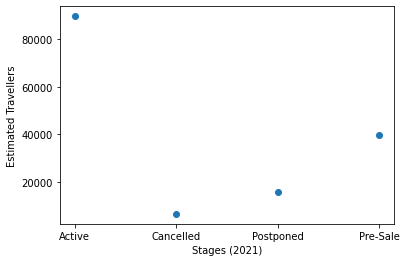

In [299]:
Stages = [stage for stage, df in Campaigns_df.groupby(['Native Stage'])]
plt.scatter(Stages, Campaigns_stage)
plt.xticks(Stages)
plt.ylabel('Estimated Travellers')
plt.xlabel('Stages (2021)')

What month may we see the most travellers? How many travellers can we expect?


In [235]:
monthly_travellers = Campaigns_df.groupby('Start_Month').sum()['Estimated_Travellers']
results.head(13)

Start_Month
3      6401
4     10920
5     23101
6     15049
7      6625
8      4895
9     38372
10    27324
11    12302
12     6383
Name: Estimated_Travellers, dtype: int64

Text(0.5, 0, 'Months (2021)')

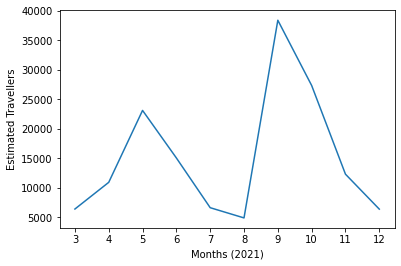

In [295]:
import matplotlib.pyplot as plt
months = range(3, 13)
plt.plot(months, monthly_travellers)
plt.xticks(months)
plt.ylabel('Estimated Travellers')
plt.xlabel('Months (2021)')

0     20
1     38
2     36
3     46
4     36
      ..
58    40
59    13
60    18
61     9
62    10
Name: Start_Week, Length: 63, dtype: int64

In [254]:
weekly_travellers = Campaigns_df.groupby('Start_Week').sum()['Estimated_Travellers']
weekly_travellers.head(52)

Start_Week
9      1221
10     3081
12     2099
13     1446
14     2563
15     1929
16     1650
17     3332
18     4431
19     2452
20     5626
21    10592
22     5928
23     6632
24     2489
30     6625
33     1940
34     2955
35     5167
36     7765
37    12151
38     9970
39     5705
40    18247
42     1333
43     5358
44     3281
45     3634
46     3832
47     1555
48     1755
50     4628
Name: Estimated_Travellers, dtype: int64

ValueError: ignored

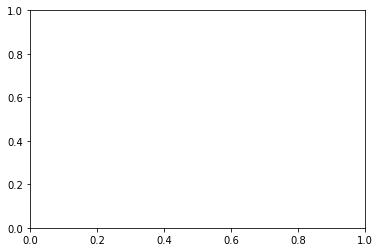

In [255]:
weeks = range(9, 50)
plt.bar(weeks, weekly_travellers)
plt.xticks(weeks)
plt.ylabel('Estimated Travellers')
plt.xlabel('Weeks (2021)')

How many travellers are on Spring Break vs Curated Travel trips?
What Location has the higest number of estimated travellers?

In [258]:
Campaigns_travellers_by_event_type = Campaigns_df.groupby(['Event Type'])['Estimated_Travellers'].sum()
Campaigns_travellers_by_event_type.head()

Event Type
["Curated Travel"]    131052
["Spring Break"]       20320
Name: Estimated_Travellers, dtype: int64

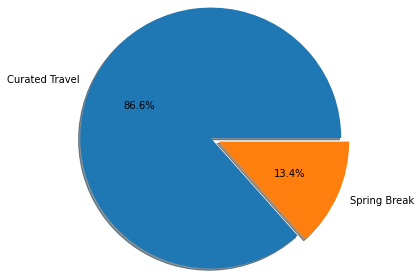

In [271]:
Estimated_Travellers = ['131052', '20320']
Event_Type_Labels = ['Curated Travel', 'Spring Break']
plt.pie(Estimated_Travellers, labels = Event_Type_Labels, radius = 1.5, autopct = '%0.1f%%', shadow = True, explode = [0, 0.1])
plt.show()

In [286]:
Campaigns_location = Campaigns_df.groupby(['Location: Name'])['Estimated_Travellers'].sum().sort_values()
Campaigns_location

Location: Name
Lake Havasu, Arizona               1590
Les Deux Alpes, France             1659
Mykonos, Greece                    1766
Tenerife, Spain                    1940
Punta Cana, Dominican Republic     2160
Cabo San Lucas, Mexico             2164
Budapest, Hungary                  2488
Palm Desert, California            2489
Dubai, United Arab Emirates        2969
Malta                              3574
Val Thorens, France                4302
Miami, Florida                     4551
Barcelona, Spain                   5030
San Juan, Puerto Rico              5779
Berlin, Germany                    6625
Cancun, Mexico                    16738
Ibiza, Spain                      21684
Las Vegas, Nevada                 29392
Amsterdam, Netherlands            34472
Name: Estimated_Travellers, dtype: int64

Text(0.5, 0, 'Locations (2021)')

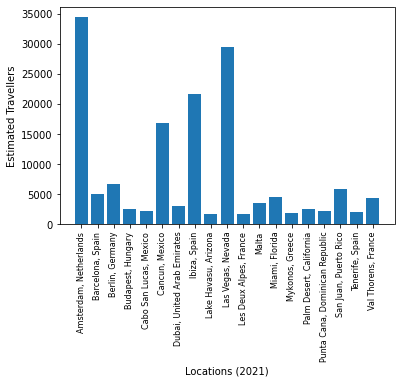

In [285]:
Cities = [city for city, df in Campaigns_df.groupby(['Location: Name'])]
plt.bar(Cities, Campaigns_location)
plt.xticks(Locations, rotation = 'vertical', size = 8)
plt.ylabel('Estimated Travellers')
plt.xlabel('Locations (2021)')

When should we put an event on-sale to maximise likelihood of customers buying a ticket/package?

In [290]:
Campaigns_df.columns

Index(['Event Identifier', 'Region', 'Native Stage', 'Last Stage Change Date',
       'Location: Name', 'Number of Nights', 'Start_Date', 'End_Date',
       'On_sale_date_time', 'Event Type', 'Estimated_Travellers',
       'Start_Month', 'Start_Week'],
      dtype='object')

In [291]:
Campaigns_df.dtypes

Event Identifier                  object
Region                            object
Native Stage                      object
Last Stage Change Date            object
Location: Name                    object
Number of Nights                   int64
Start_Date                datetime64[ns]
End_Date                          object
On_sale_date_time                 object
Event Type                        object
Estimated_Travellers               int64
Start_Month                        int64
Start_Week                         int64
dtype: object

In [292]:
Campaigns_df['On_sale_date_time'] = pd.to_datetime(Campaigns_df['On_sale_date_time'])

In [293]:
#Need timestamp and booking table to figure out best time to put up an event (using list comprehension to go through hours and grouping by each hour, aggregating with count, plotting a line graph)

,Event Identifier,Region,Native Stage,Last Stage Change Date,Location: Name,Number of Nights,Start_Date,End_Date,On_sale_date_time,Event Type,Estimated_Travellers,Start_Month,Start_Week
0,=3984258,North America,Pre-Sale,1/7/2021,"Punta Cana, Dominican Republic",4,2021-05-20,5/24/2021,2020-12-15,"[""Curated Travel""]",2160,5,20
1,=A2+175,Europe,Pre-Sale,1/12/2021,"Mykonos, Greece",4,2021-09-24,9/28/2021,NaT,"[""Curated Travel""]",735,9,38
2,=A3+175,North America,Pre-Sale,10/13/2020,"Las Vegas, Nevada",3,2021-09-10,9/13/2021,2021-03-02,"[""Spring Break""]",3605,9,36
3,=A4+175,Europe,Pre-Sale,10/27/2020,"Amsterdam, Netherlands",3,2021-11-19,11/22/2021,NaT,"[""Curated Travel""]",1563,11,46
4,=A5+175,Europe,Pre-Sale,2/1/2021,"Ibiza, Spain",4,2021-09-08,9/12/2021,NaT,"[""Curated Travel""]",4160,9,36
